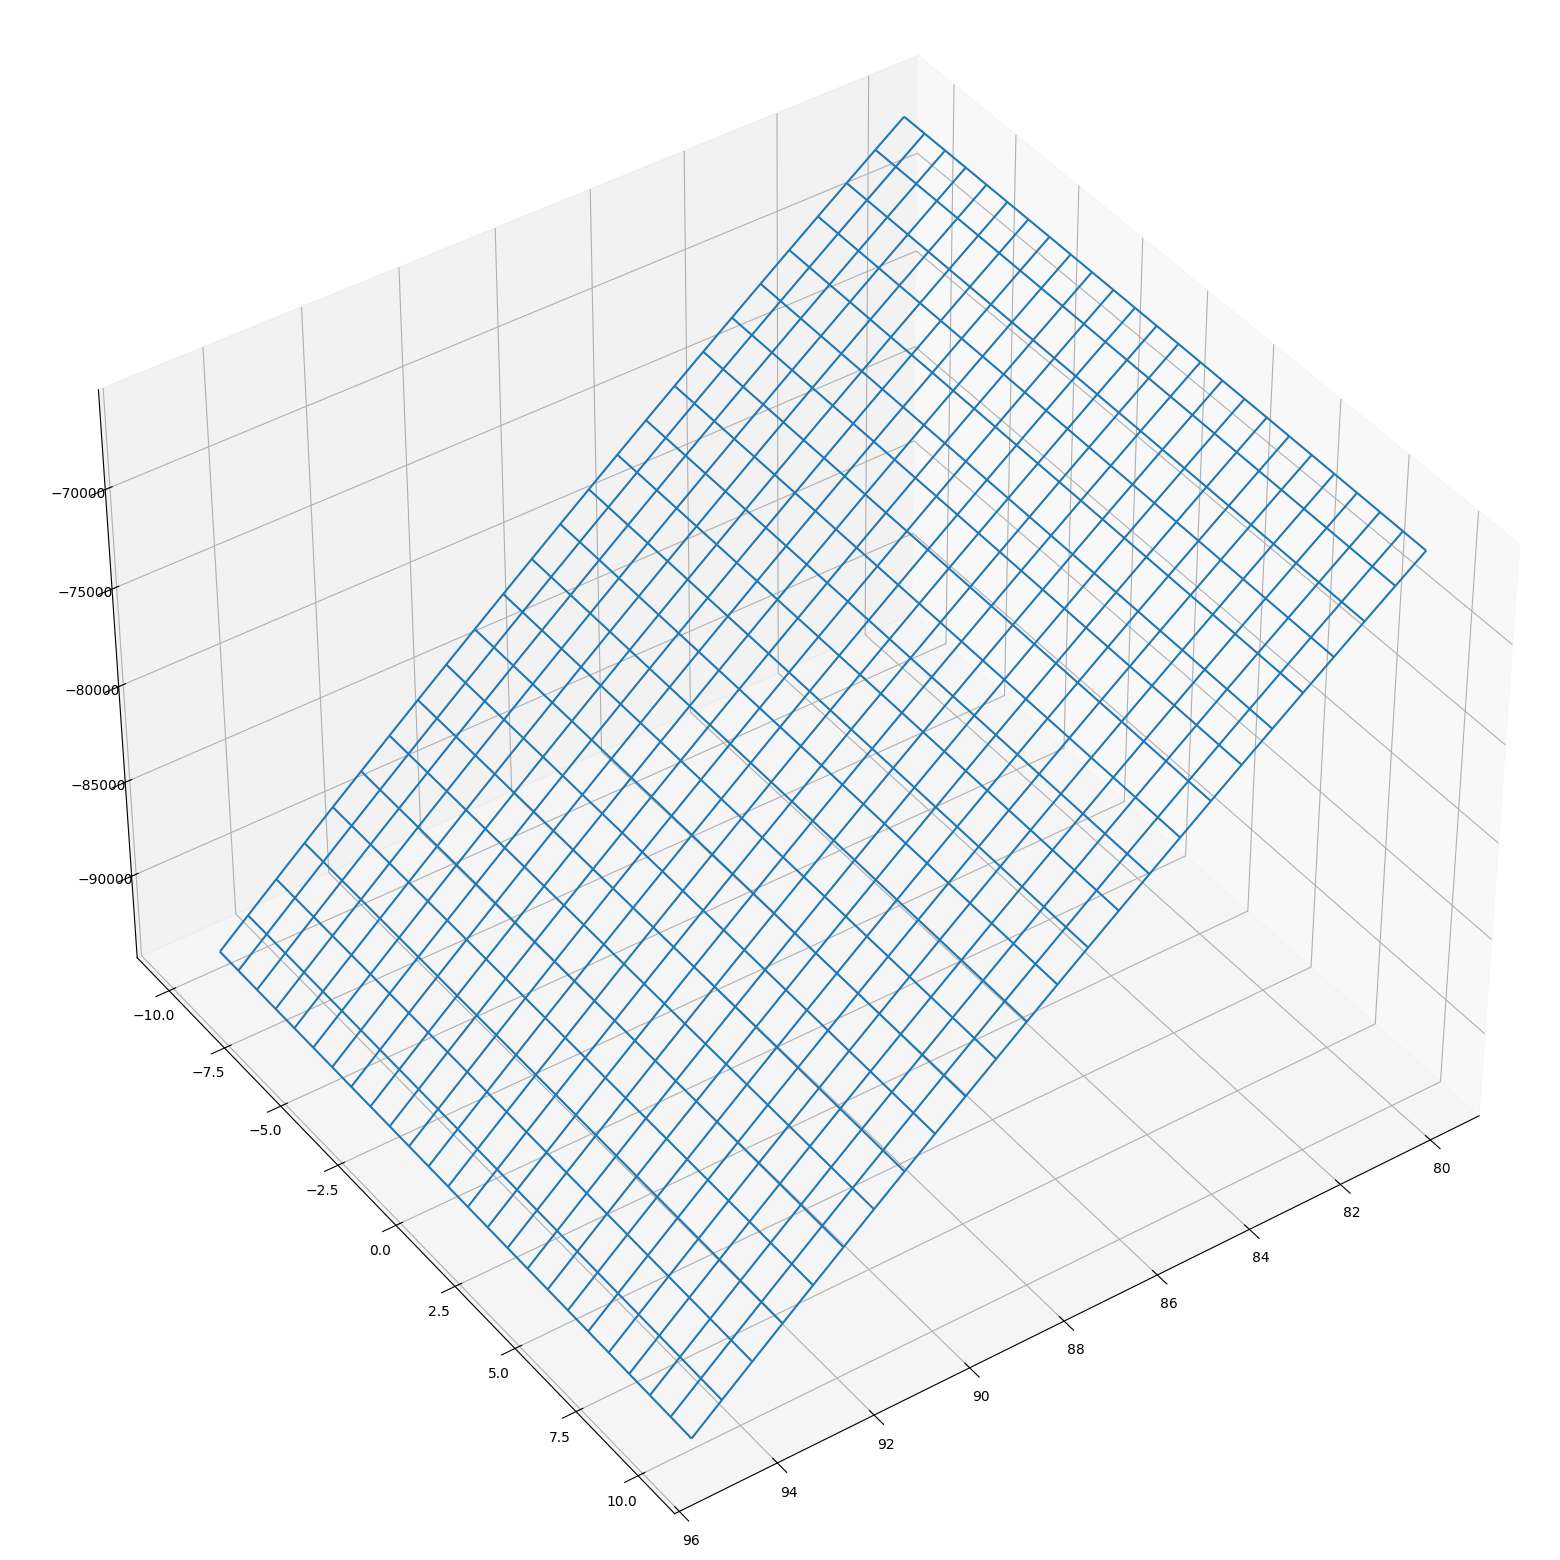

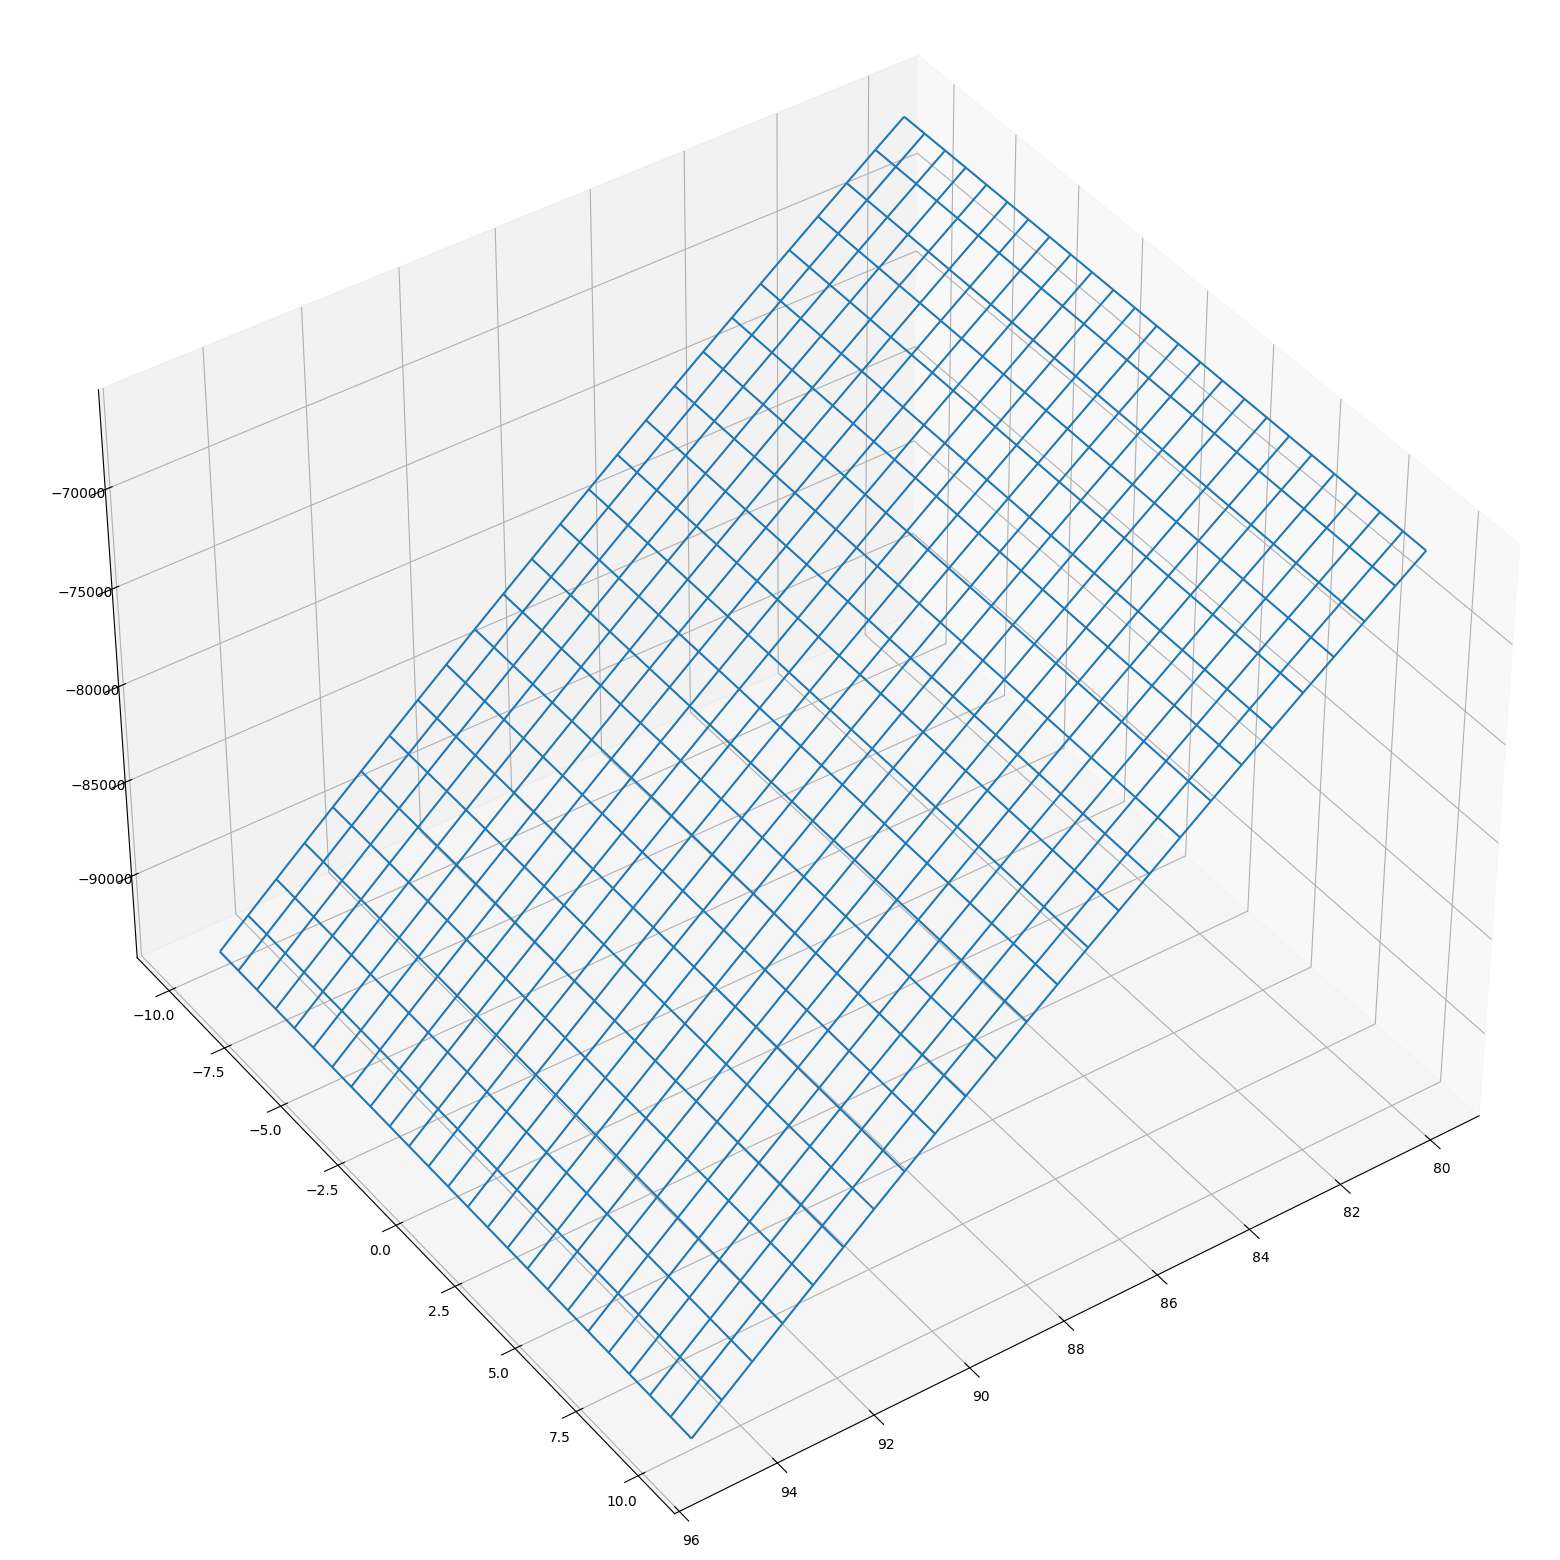

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/3.3.1/gallery/mplot3d/surface3d.html

def draw_graph(f,x,y,elev_azim=[]):
    X,Y = np.meshgrid(x,y)
    fig = plt.figure(figsize=(20,20))

    for idx,(e,a) in enumerate(elev_azim,start=1):
        
        ax = fig.add_subplot(1,len(elev_azim),idx,projection='3d',elev=e,azim=a)
        ax.plot_wireframe(X,Y,f(X,Y))
    
    return fig

def F(h,t):
	return -0.38*t**2 - 0.223*t*h - 10.982*h**2 + 7.112*t + 60.912*h - 328.898

x = np.linspace(80,95,25)
y = np.linspace(-10,10,25)

draw_graph(F,x,y,[(40,55)])


In [6]:
# optimal rebate as a function of s
def r(s):
    return 50*(12*s - 1)/s

# profit as a function of rebate and sensitivity
def p(r,s):
    return (1200-r)*(1+s*r/100)
	   

# sensitivity of S to r
def S(s):
    return 50/(s*r(s))

In [13]:
S(.15)

1.2500000000000002

In [14]:
import sympy as sp


In [18]:
ss = sp.Symbol('s')

In [21]:
x=p(r(ss),ss)
x

(1200 - (600*s - 50)/s)*(6*s + 1/2)

In [22]:
sp.diff(x)

(-600/s + (600*s - 50)/s**2)*(6*s + 1/2) + 7200 - 6*(600*s - 50)/s

In [23]:
sp.simplify(x)

25*(12*s + 1)**2/s

In [24]:
x

(1200 - (600*s - 50)/s)*(6*s + 1/2)

In [25]:
sp.simplify(sp.diff(x))

3600 - 25/s**2

In [17]:
def r(s):
	   return 50*(12*s - 1)/s
       
def RebateSens(s):
	return 50/(s*r(s))
	
def DerivProfitWRTs(s):
	   return 3600 - 25/s**2

def ProfitSens(s):
	   return DerivProfitWRTs(s) * s/p(r(s),s) 

In [8]:
ProfitSens(.15)

0.2857142857142857

In [18]:
rr = 266.66  # optimal rebate for s=0.15

rr *(1-.33*RebateSens(.15))

156.66275